# Project info - supervised learning

## Description

The task is to build a model that will predict whether or not a patient will no show for an appointment. This is a binary classification problem.

## Data dictionary

- Label:
    - NoShow - Yes/No indicator describing patient's appointment attendance. 'Yes' means the patient was a no-show.
- Features:
    - PatientId - Identification of a patient 
    - AppointmentId - Identification of each appointment 
    - Gender = Male or Female 
    - AppointmentDay = The date of the appointment
    - ScheduledDay = The date the appointment was scheduled 
    - Age = Patient age in years
    - Neighborhood = Appointment location 
    - Scholarship = True of False
    - Hypertension = True or False 
    - Diabetes = True or False 
    - Alcoholism = True or False 
    - Handicap = True or False 
    - SMSReceived = True or False

# Import modules and tools

In [1]:
# standard libary and settings
import os
import sys
import importlib
import itertools
import csv
import ast
from timeit import default_timer as timer

global ITERATION
import time
from functools import reduce

rundate = time.strftime("%Y%m%d")

import warnings

warnings.simplefilter("ignore")
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))

# data extensions and settings
import numpy as np

np.set_printoptions(threshold=np.inf, suppress=True)
import pandas as pd

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.options.display.float_format = "{:,.6f}".format

# modeling extensions
import sklearn.base as base
import sklearn.cluster as cluster
import sklearn.datasets as datasets
import sklearn.decomposition as decomposition
import sklearn.discriminant_analysis as discriminant_analysis
import sklearn.ensemble as ensemble
import sklearn.feature_extraction as feature_extraction
import sklearn.feature_selection as feature_selection
import sklearn.gaussian_process as gaussian_process
import sklearn.linear_model as linear_model
import sklearn.kernel_ridge as kernel_ridge
import sklearn.metrics as metrics
import sklearn.model_selection as model_selection
import sklearn.naive_bayes as naive_bayes
import sklearn.neighbors as neighbors
import sklearn.pipeline as pipeline
import sklearn.preprocessing as preprocessing
import sklearn.svm as svm
import sklearn.tree as tree
import sklearn.utils as utils

import eif as iso

from scipy import stats, special
import xgboost
import lightgbm
import catboost

from hyperopt import hp, tpe, Trials, fmin, STATUS_OK
from hyperopt.pyll.stochastic import sample

# visualization extensions and settings
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# custom extensions and settings
sys.path.append("/home/mlmachine") if "/home/mlmachine" not in sys.path else None
sys.path.append("/home/prettierplot") if "/home/prettierplot" not in sys.path else None

import mlmachine as mlm
from prettierplot.plotter import PrettierPlot
import prettierplot.style as style

# Load, inspect, clean, prepare data

In [2]:
# Load and inspect data

df = pd.read_csv(
    "data/kaggleApptNoShow.csv",
    header=0,
    names=[
        "PatientId",
        "AppointmentId",
        "Gender",
        "ScheduledDay",
        "AppointmentDay",
        "Age",
        "Neighborhood",
        "Scholarship",
        "Hypertension",
        "Diabetes",
        "Alcoholism",
        "Handicap",
        "SMSReceived",
        "Label",
    ],
)
df.info()
display(df[:5])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentId     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighborhood      110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMSReceived       110527 non-null int64
Label             110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Label
0,"29,872,499,824,296.000000",5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,"558,997,776,694,438.000000",5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,"4,262,962,299,951.000000",5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,"867,951,213,174.000000",5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,"8,841,186,448,183.000000",5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> Remarks - Zero nulls in this dataset

***********************************************************
categorical columns 
***********************************************************



Univariate summary Biivariate summary 
 
 
 Scholarship 
 Count 
 Proportion 
 
 
 
 
 0.000000 
 99,666.000000 
 90.173442 
 
 
 1.000000 
 10,861.000000 
 9.826558 
 
 
 
 
 
 Scholarship 
 No 
 Yes 
 
 
 
 
 0 
 79925 
 19741 
 
 
 1 
 8283 
 2578

<Figure size 432x288 with 0 Axes>

<Figure size 1836x345.6 with 0 Axes>

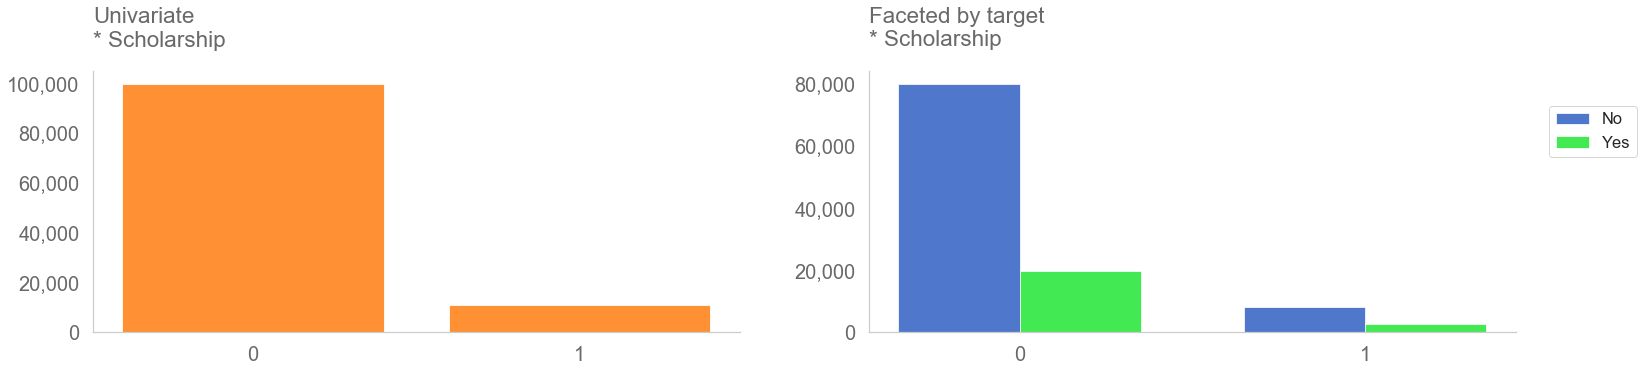

Univariate summary Biivariate summary 
 
 
 Hypertension 
 Count 
 Proportion 
 
 
 
 
 0.000000 
 88,726.000000 
 80.275408 
 
 
 1.000000 
 21,801.000000 
 19.724592 
 
 
 
 
 
 Hypertension 
 No 
 Yes 
 
 
 
 
 0 
 70179 
 18547 
 
 
 1 
 18029 
 3772

<Figure size 1836x345.6 with 0 Axes>

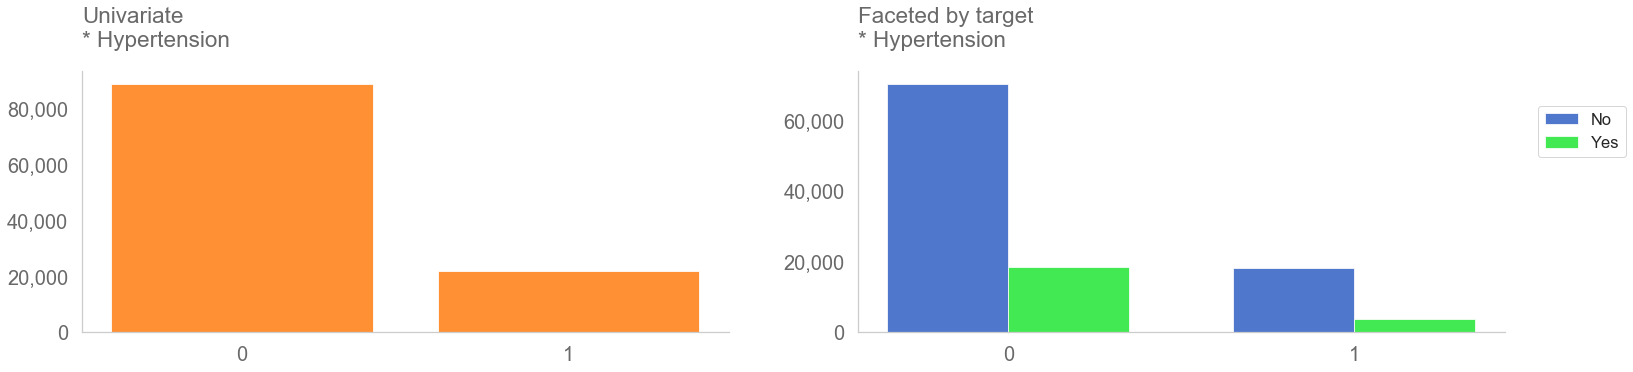

Univariate summary Biivariate summary 
 
 
 Diabetes 
 Count 
 Proportion 
 
 
 
 
 0.000000 
 102,584.000000 
 92.813521 
 
 
 1.000000 
 7,943.000000 
 7.186479 
 
 
 
 
 
 Diabetes 
 No 
 Yes 
 
 
 
 
 0 
 81695 
 20889 
 
 
 1 
 6513 
 1430

<Figure size 1836x345.6 with 0 Axes>

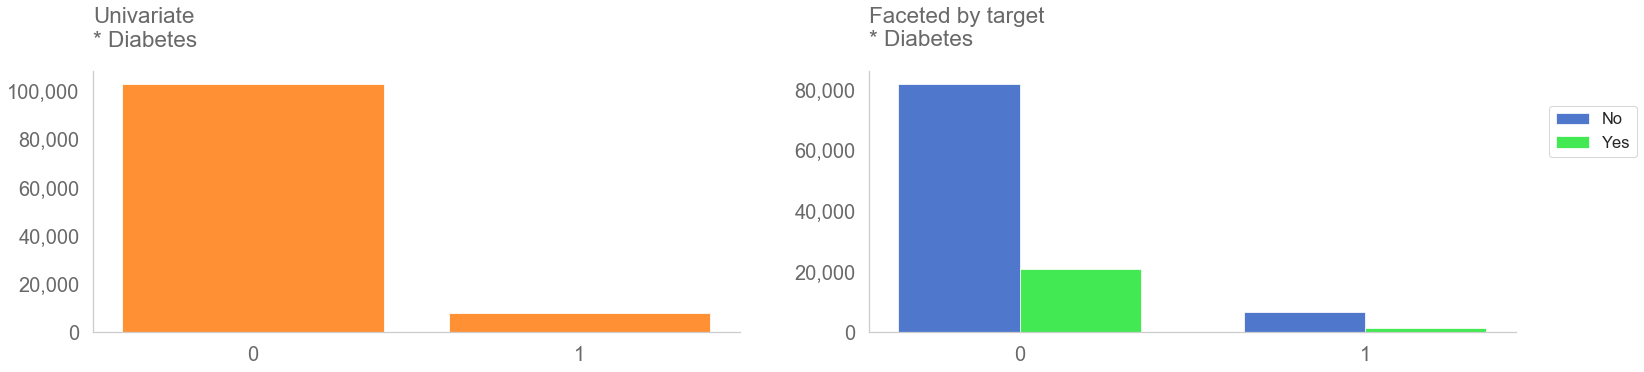

Univariate summary Biivariate summary 
 
 
 Alcoholism 
 Count 
 Proportion 
 
 
 
 
 0.000000 
 107,167.000000 
 96.960019 
 
 
 1.000000 
 3,360.000000 
 3.039981 
 
 
 
 
 
 Alcoholism 
 No 
 Yes 
 
 
 
 
 0 
 85525 
 21642 
 
 
 1 
 2683 
 677

<Figure size 1836x345.6 with 0 Axes>

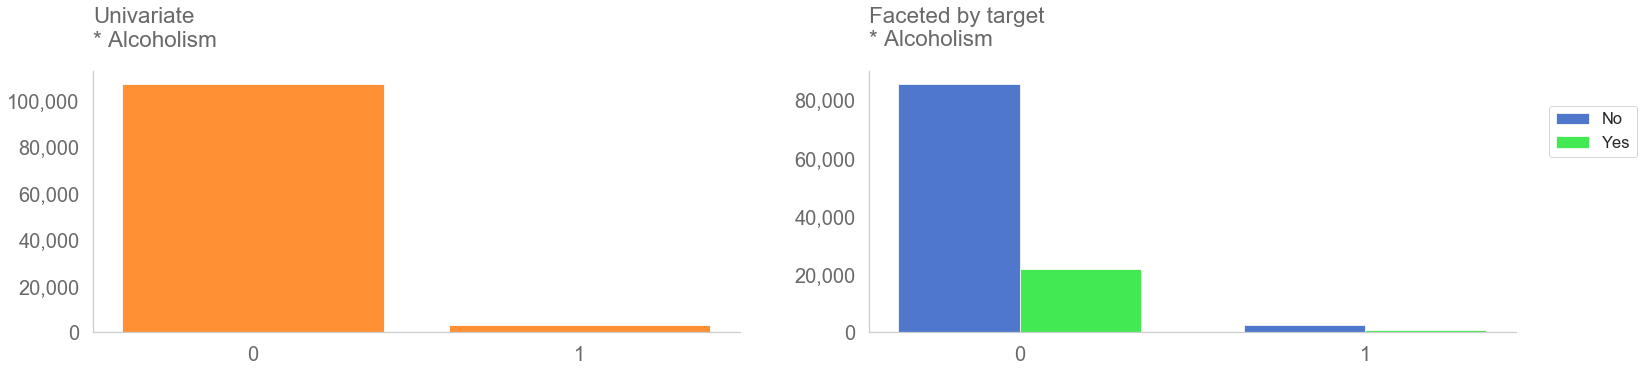

Univariate summary Biivariate summary 
 
 
 Handicap 
 Count 
 Proportion 
 
 
 
 
 0.000000 
 108,286.000000 
 97.972441 
 
 
 1.000000 
 2,042.000000 
 1.847512 
 
 
 2.000000 
 183.000000 
 0.165570 
 
 
 3.000000 
 13.000000 
 0.011762 
 
 
 4.000000 
 3.000000 
 0.002714 
 
 
 
 
 
 Handicap 
 No 
 Yes 
 
 
 
 
 0 
 86374 
 21912 
 
 
 1 
 1676 
 366 
 
 
 2 
 146 
 37 
 
 
 3 
 10 
 3 
 
 
 4 
 2 
 1

<Figure size 1836x345.6 with 0 Axes>

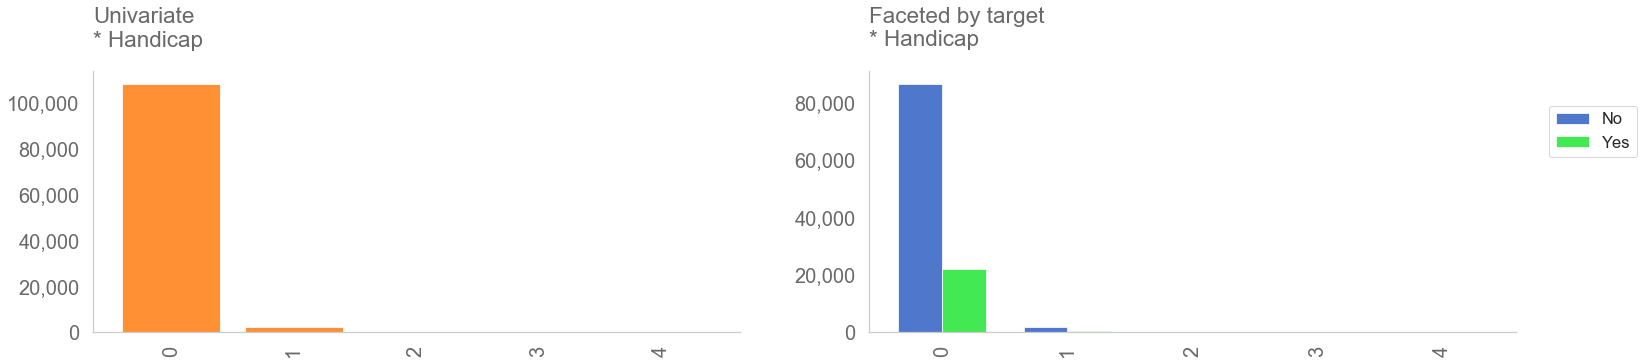

Univariate summary Biivariate summary 
 
 
 SMSReceived 
 Count 
 Proportion 
 
 
 
 
 0.000000 
 75,045.000000 
 67.897437 
 
 
 1.000000 
 35,482.000000 
 32.102563 
 
 
 
 
 
 SMSReceived 
 No 
 Yes 
 
 
 
 
 0 
 62510 
 12535 
 
 
 1 
 25698 
 9784

<Figure size 1836x345.6 with 0 Axes>

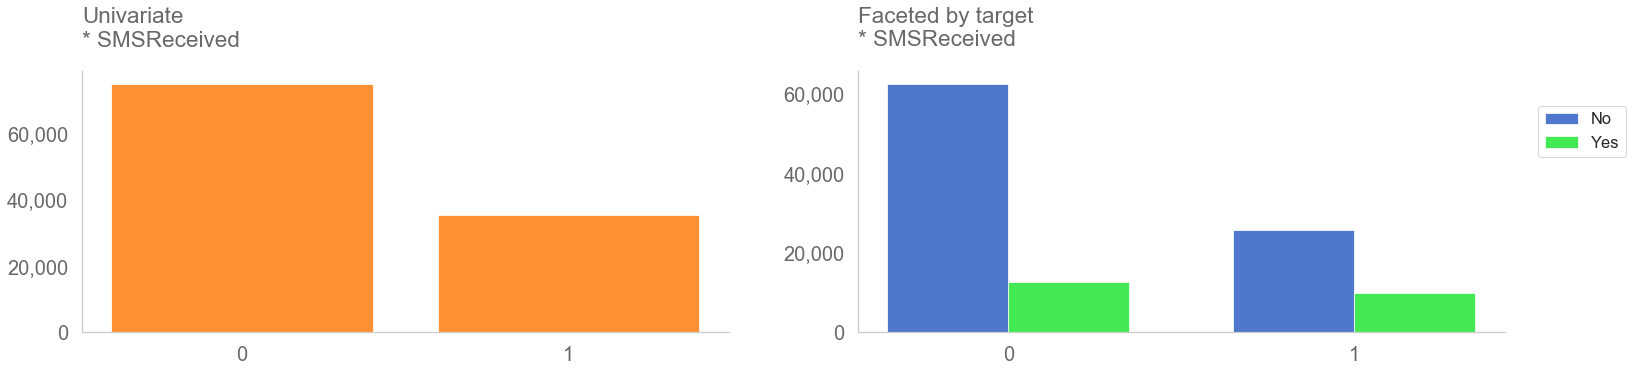

Univariate summary Biivariate summary 
 
 
 Gender 
 Count 
 Proportion 
 
 
 
 
 F 
 71840 
 64.997693 
 
 
 M 
 38687 
 35.002307 
 
 
 
 
 
 Gender 
 No 
 Yes 
 
 
 
 
 F 
 57246 
 14594 
 
 
 M 
 30962 
 7725

<Figure size 1836x345.6 with 0 Axes>

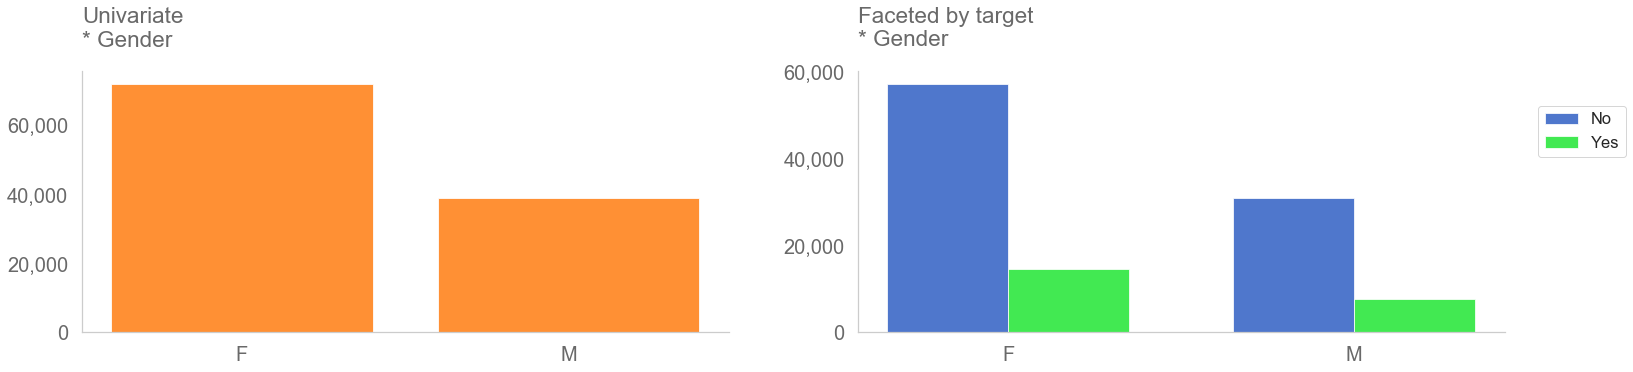

Univariate summary Biivariate summary 
 
 
 Neighborhood 
 Count 
 Proportion 
 
 
 
 
 JARDIM CAMBURI 
 7717 
 6.982004 
 
 
 MARIA ORTIZ 
 5805 
 5.252110 
 
 
 RESISTÊNCIA 
 4431 
 4.008975 
 
 
 JARDIM DA PENHA 
 3877 
 3.507740 
 
 
 ITARARÉ 
 3514 
 3.179314 
 
 
 CENTRO 
 3334 
 3.016458 
 
 
 TABUAZEIRO 
 3132 
 2.833697 
 
 
 SANTA MARTHA 
 3131 
 2.832792 
 
 
 JESUS DE NAZARETH 
 2853 
 2.581270 
 
 
 BONFIM 
 2773 
 2.508889 
 
 
 SANTO ANTÔNIO 
 2746 
 2.484461 
 
 
 SANTO ANDRÉ 
 2571 
 2.326128 
 
 
 CARATOÍRA 
 2565 
 2.320700 
 
 
 JABOUR 
 2509 
 2.270034 
 
 
 SÃO PEDRO 
 2448 
 2.214843 
 
 
 ILHA DO PRÍNCIPE 
 2266 
 2.050178 
 
 
 NOVA PALESTINA 
 2264 
 2.048368 
 
 
 ANDORINHAS 
 2262 
 2.046559 
 
 
 DA PENHA 
 2217 
 2.005845 
 
 
 ROMÃO 
 2215 
 2.004035 
 
 
 GURIGICA 
 2018 
 1.825798 
 
 
 SÃO JOSÉ 
 1977 
 1.788703 
 
 
 BELA VISTA 
 1907 
 1.725370 
 
 
 MARUÍPE 
 1902 
 1.720846 
 
 
 FORTE SÃO JOÃO 
 1889 
 1.709085 
 
 
 ILHA DE SANTA MARIA 
 1885 
 1.705466 
 
 
 SÃO CRISTÓVÃO 
 1836 
 1.661133 
 
 
 REDENÇÃO 
 1553 
 1.405087 
 
 
 SÃO BENEDITO 
 1439 
 1.301944 
 
 
 JOANA D´ARC 
 1427 
 1.291087 
 
 
 CRUZAMENTO 
 1398 
 1.264849 
 
 
 CONSOLAÇÃO 
 1376 
 1.244945 
 
 
 SANTA TEREZA 
 1332 
 1.205135 
 
 
 PRAIA DO SUÁ 
 1288 
 1.165326 
 
 
 SANTOS DUMONT 
 1276 
 1.154469 
 
 
 GRANDE VITÓRIA 
 1071 
 0.968994 
 
 
 ILHA DAS CAIEIRAS 
 1071 
 0.968994 
 
 
 INHANGUETÁ 
 1057 
 0.956327 
 
 
 PRAIA DO CANTO 
 1035 
 0.936423 
 
 
 BENTO FERREIRA 
 858 
 0.776281 
 
 
 VILA RUBIM 
 851 
 0.769948 
 
 
 CONQUISTA 
 849 
 0.768138 
 
 
 DO QUADRO 
 849 
 0.768138 
 
 
 REPÚBLICA 
 835 
 0.755472 
 
 
 MONTE BELO 
 824 
 0.745519 
 
 
 PARQUE MOSCOSO 
 802 
 0.725615 
 
 
 GOIABEIRAS 
 700 
 0.633329 
 
 
 JUCUTUQUARA 
 694 
 0.627901 
 
 
 FONTE GRANDE 
 682 
 0.617044 
 
 
 MATA DA PRAIA 
 644 
 0.582663 
 
 
 DO CABRAL 
 560 
 0.506664 
 
 
 SANTOS REIS 
 547 
 0.494902 
 
 
 ESTRELINHA 
 538 
 0.486759 
 
 
 SANTA CLARA 
 506 
 0.457807 
 
 
 SOLON BORGES 
 469 
 0.424331 
 
 
 PIEDADE 
 452 
 0.408950 
 
 
 SANTA CECÍLIA 
 448 
 0.405331 
 
 
 SANTA LÚCIA 
 438 
 0.396283 
 
 
 SANTA LUÍZA 
 428 
 0.387236 
 
 
 BARRO VERMELHO 
 423 
 0.382712 
 
 
 DO MOSCOSO 
 413 
 0.373664 
 
 
 MÁRIO CYPRESTE 
 371 
 0.335665 
 
 
 BOA VISTA 
 312 
 0.282284 
 
 
 COMDUSA 
 310 
 0.280474 
 
 
 DE LOURDES 
 305 
 0.275951 
 
 
 ARIOVALDO FAVALESSA 
 282 
 0.255141 
 
 
 ANTÔNIO HONÓRIO 
 271 
 0.245189 
 
 
 FRADINHOS 
 258 
 0.233427 
 
 
 ENSEADA DO SUÁ 
 235 
 0.212618 
 
 
 SANTA HELENA 
 178 
 0.161047 
 
 
 HORTO 
 175 
 0.158332 
 
 
 UNIVERSITÁRIO 
 152 
 0.137523 
 
 
 SEGURANÇA DO LAR 
 145 
 0.131190 
 
 
 NAZARETH 
 135 
 0.122142 
 
 
 MORADA DE CAMBURI 
 96 
 0.086857 
 
 
 PONTAL DE CAMBURI 
 69 
 0.062428 
 
 
 ILHA DO BOI 
 35 
 0.031666 
 
 
 ILHA DO FRADE 
 10 
 0.009048 
 
 
 AEROPORTO 
 8 
 0.007238 
 
 
 ILHAS OCEÂNICAS DE TRINDADE 
 2 
 0.001810 
 
 
 PARQUE INDUSTRIAL 
 1 
 0.000905 
 
 
 
 
 
 Neighborhood 
 No 
 Yes 
 
 
 
 
 AEROPORTO 
 7.000000 
 1.000000 
 
 
 ANDORINHAS 
 1,741.000000 
 521.000000 
 
 
 ANTÔNIO HONÓRIO 
 221.000000 
 50.000000 
 
 
 ARIOVALDO FAVALESSA 
 220.000000 
 62.000000 
 
 
 BARRO VERMELHO 
 332.000000 
 91.000000 
 
 
 BELA VISTA 
 1,523.000000 
 384.000000 
 
 
 BENTO FERREIRA 
 665.000000 
 193.000000 
 
 
 BOA VISTA 
 254.000000 
 58.000000 
 
 
 BONFIM 
 2,223.000000 
 550.000000 
 
 
 CARATOÍRA 
 1,974.000000 
 591.000000 
 
 
 CENTRO 
 2,631.000000 
 703.000000 
 
 
 COMDUSA 
 254.000000 
 56.000000 
 
 
 CONQUISTA 
 689.000000 
 160.000000 
 
 
 CONSOLAÇÃO 
 1,139.000000 
 237.000000 
 
 
 CRUZAMENTO 
 1,094.000000 
 304.000000 
 
 
 DA PENHA 
 1,788.000000 
 429.000000 
 
 
 DE LOURDES 
 258.000000 
 47.000000 
 
 
 DO CABRAL 
 472.000000 
 88.000000 
 
 
 DO MOSCOSO 
 321.000000 
 92.000000 
 
 
 DO QUADRO 
 709.000000 
 140.000000 
 
 
 ENSEADA DO SUÁ 
 183.000000 
 52.000000 
 
 
 ESTRELINHA 
 432.000000 
 106.000000 
 
 
 FONTE GRA

<Figure size 1836x345.6 with 0 Axes>

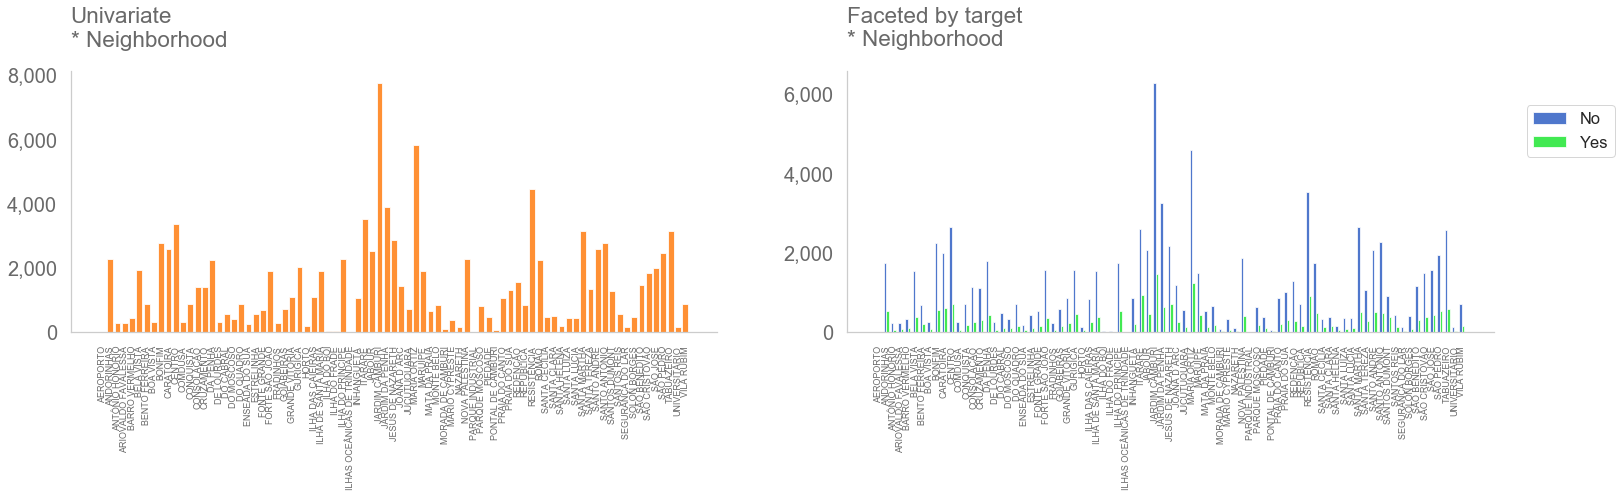

***********************************************************
numerical columns 
***********************************************************



Univariate stats Bivariate stats Statistical test 
 
 
 
 Age 
 
 
 
 
 count 
 110,527.000000 
 
 
 mean 
 37.088874 
 
 
 std 
 23.110205 
 
 
 min 
 -1.000000 
 
 
 25% 
 18.000000 
 
 
 50% 
 37.000000 
 
 
 75% 
 55.000000 
 
 
 max 
 115.000000 
 
 
 
 
 
 Age 
 Count 
 Proportion 
 Mean 
 StdDv 
 
 
 
 
 No 
 88208 
 79.806744 
 37.790064 
 23.338746 
 
 
 Yes 
 22319 
 20.193256 
 34.317667 
 21.965448 
 
 
 
 
 
 z-test statistic 
 p-value 
 
 
 
 
 20.089600 
 0.000000

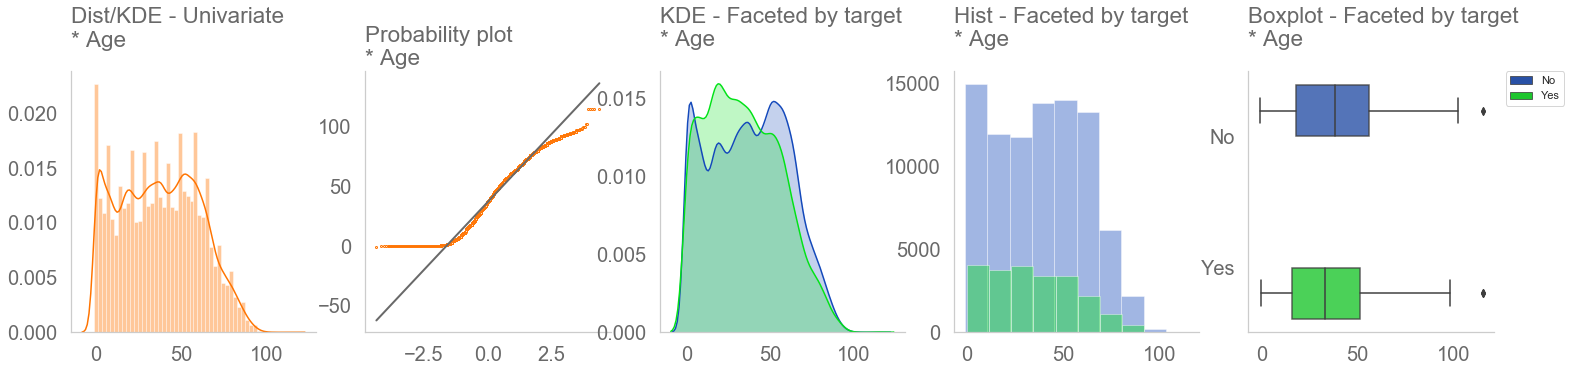

In [24]:
importlib.reload(qp)

featureEDA = qp.MLEDA(
    data=df,
    removeFeatures=["PatientId", "AppointmentId"],
    forceToCategorical=[
        "Scholarship",
        "Hypertension",
        "Diabetes",
        "Alcoholism",
        "Handicap",
        "SMSReceived",
    ],
    dateFeatures=["ScheduledDay", "AppointmentDay"],
    target=["Label"],
    targetType="categorical",
)
featureEDA.featureSummary()

## Preliminary data cleansing and feature engineering

In [56]:
# review unique values of select columns

for col in df[
    [
        "Gender",
        "Age",
        "Neighborhood",
        "Scholarship",
        "Hypertension",
        "Diabetes",
        "Alcoholism",
        "Handicap",
        "SMSReceived",
        "Label",
    ]
]:
    print(col, df[col].unique())

Gender ['F' 'M']
Age [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]
Neighborhood ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSIT

>Remarks - 
- [Gender] and [Neighborhood] are nominal features and will need to be encoded prior to modeling. 
- [ScheduledDay] and [AppointmentDay] are both shown as datetime, it appears that [AppointmentDay] does not include any information on time of day, which is unfortunate. [ScheduledDay], on the other hand, included time information. I'll want to convert these datetimes to dates and preserve the time information for [ScheduledDay]. 
- The [Label] will also need to be encoded. 
- [Handicap] should be a binary column. One solution is to reduce the values 2, 3 to 1. 
- I also observed a negative and an age of 115. It's a high value but certainly possible. The negative age values will be changed to 0.
- There are several opportunities for feature engingeering, including the number of days between the day the appointment was scheduled and the day of the actual appointment, the day of the week the appointment was scheduled and the appointment itself.

In [6]:
# Clean up and engineer time features


def parseHour(time):
    hour = int(time[11:13])
    return hour


df["ScheduledHour"] = df["ScheduledDay"].apply(parseHour)
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"]).apply(lambda x: x.date())
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"])  # Coerce to datetime datatype
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"])

df["DaysUntilAppointment"] = (df["AppointmentDay"] - df["ScheduledDay"]).dt.days
df.loc[df["DaysUntilAppointment"] > 90, "DaysUntilAppointment"] = 90

df["ScheduledDayOfWeek"] = df["ScheduledDay"].dt.day_name()
df["AppointmentDayOfWeek"] = df["AppointmentDay"].dt.day_name()
df["SameDayAppointment"] = np.where(
    df["ScheduledDay"] == df["AppointmentDay"], "Yes", "No"
)

# Convert [Handicap] values higher than 1 to 1

df.loc[df["Handicap"] > 1, "Handicap"] = 1

# Convert [Handicap] values higher than 1 to 1

df.loc[df["Age"] <= 0, "Age"] = 0

# Drop unnecessary columns

del df["AppointmentId"]
del df["PatientId"]
del df["ScheduledDay"]
del df["AppointmentDay"]

# Inspect changes

df[:5]

,Gender,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Label,ScheduledHour,DaysUntilAppointment,ScheduledDayOfWeek,AppointmentDayOfWeek,SameDayAppointment
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18,0,Friday,Friday,Yes
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16,0,Friday,Friday,Yes
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,16,0,Friday,Friday,Yes
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17,0,Friday,Friday,Yes
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16,0,Friday,Friday,Yes


## Preliminary EDA

In [7]:
# Identify feature types

target = "Label"

skipFeatures = ["PatientId", "AppointmentId", "ScheduledDay", "AppointmentDay"]

featureType = {}
for c in [c for c in df.columns if c not in skipFeatures]:
    if c == target:
        continue

    dataType = "bool" if len(df[c].unique()) == 2 else str(df[c].dtype)
    if dataType not in featureType.keys():
        featureType[dataType] = [c]
    else:
        featureType[dataType].append(c)

allFeatures = []
for i in featureType.values():
    allFeatures.extend(i)

featureType

{'bool': ['Gender',
  'Scholarship',
  'Hypertension',
  'Diabetes',
  'Alcoholism',
  'Handicap',
  'SMSReceived',
  'SameDayAppointment'],
 'int64': ['Age', 'ScheduledHour', 'DaysUntilAppointment'],
 'object': ['Neighborhood', 'ScheduledDayOfWeek', 'AppointmentDayOfWeek']}

In [8]:
# Categorize features

identifiedFeatures = []
nomFeatures = []
ordFeatures = []
numFeatures = []


# Identify nominal features

for i in [i for i in featureType["object"] if i not in identifiedFeatures]:
    nomFeatures.append(i)
    identifiedFeatures.append(i)


for i in [i for i in featureType["bool"] if i not in identifiedFeatures]:
    nomFeatures.append(i)
    identifiedFeatures.append(i)


# Identify ordinal features

for i in [
    i
    for i in featureType["int64"]
    if len(df[i].unique()) < 10 and i not in identifiedFeatures
]:
    ordFeatures.append(i)
    identifiedFeatures.append(i)


# Identify numerical columns

for i in [i for i in featureType["int64"] if i not in identifiedFeatures]:
    numFeatures.append(i)
    identifiedFeatures.append(i)


# summary

print(
    "Unidentified features: \n {0} \n".format(
        [i for i in allFeatures if i not in identifiedFeatures]
    )
)
print("Nominal features : \n {0} \n".format(nomFeatures))
print("Ordinal features : \n {0} \n".format(ordFeatures))
print("Numerical features : \n {0} \n".format(numFeatures))

Unidentified features: 
 [] 

Nominal features : 
 ['Neighborhood', 'ScheduledDayOfWeek', 'AppointmentDayOfWeek', 'Gender', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'SameDayAppointment'] 

Ordinal features : 
 [] 

Numerical features : 
 ['Age', 'ScheduledHour', 'DaysUntilAppointment'] 



In [9]:
# Evaluate summary statistic of numerical features

df[numFeatures].describe()

,Age,ScheduledHour,DaysUntilAppointment
count,"110,527.000000","110,527.000000","110,527.000000"
mean,37.088883,10.774517,10.122034
std,23.110190,3.216189,14.798649
min,0.000000,6.000000,-6.000000
25%,18.000000,8.000000,0.000000
50%,37.000000,10.000000,4.000000
75%,55.000000,13.000000,15.000000
max,115.000000,21.000000,90.000000


### Univariate plots

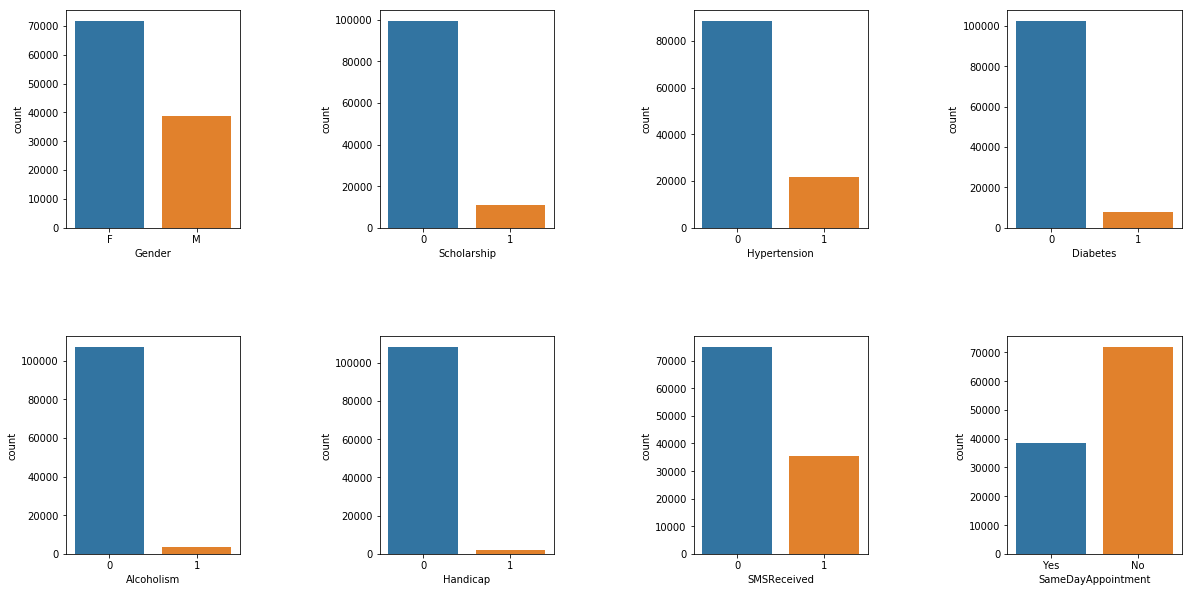

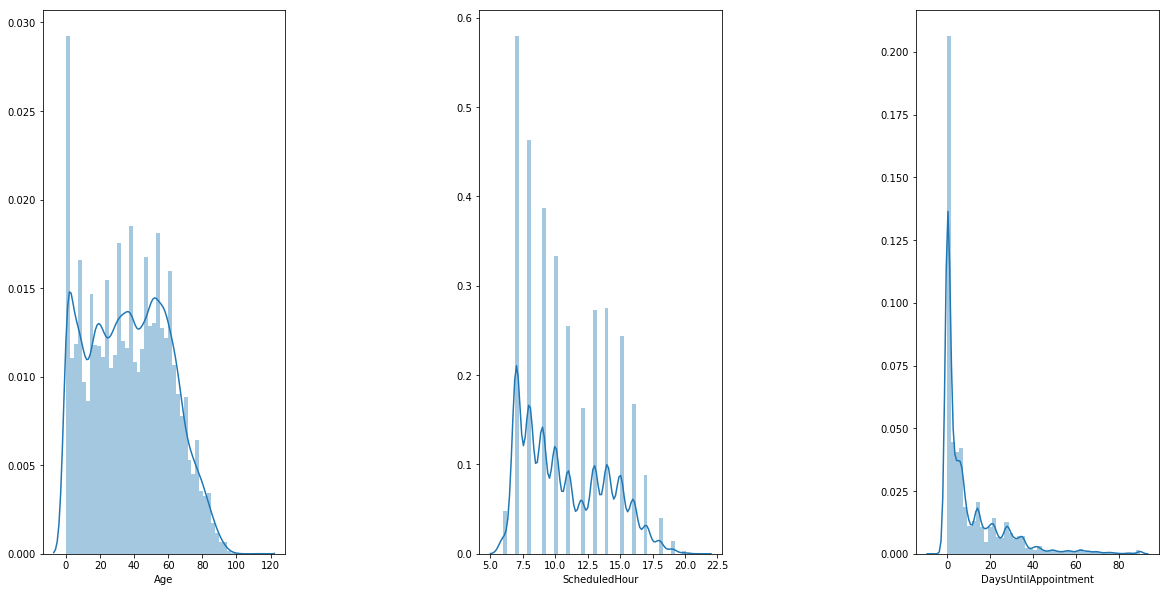

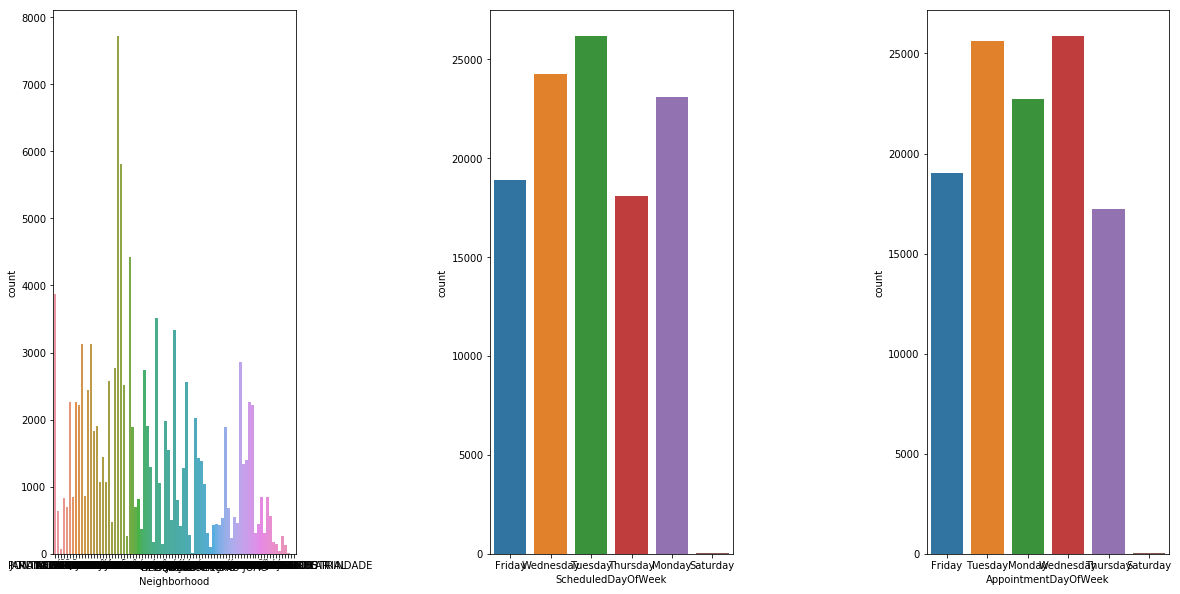

In [10]:
# Review univariate distrubutions of each feature type and feature

univariatePlotter(df, featureType)

### Bivariate EDA, target vs. non-numerical

Neighborhood,AEROPORTO,ANDORINHAS,ANTÔNIO HONÓRIO,ARIOVALDO FAVALESSA,BARRO VERMELHO,BELA VISTA,BENTO FERREIRA,BOA VISTA,BONFIM,CARATOÍRA,...,SANTOS REIS,SEGURANÇA DO LAR,SOLON BORGES,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,UNIVERSITÁRIO,VILA RUBIM
Label,,,,,,,,,,,,,,,,,,,,,
No,7.000000,"1,741.000000",221.000000,220.000000,332.000000,"1,523.000000",665.000000,254.000000,"2,223.000000","1,974.000000",...,435.000000,117.000000,400.000000,"1,152.000000","1,473.000000","1,549.000000","1,933.000000","2,559.000000",120.000000,710.000000
Yes,1.000000,521.000000,50.000000,62.000000,91.000000,384.000000,193.000000,58.000000,550.000000,591.000000,...,112.000000,28.000000,69.000000,287.000000,363.000000,428.000000,515.000000,573.000000,32.000000,141.000000


No show rate among Neighborhood = AEROPORTO: 0.125
No show rate among Neighborhood = ANDORINHAS: 0.23
No show rate among Neighborhood = ANTÔNIO HONÓRIO: 0.185
No show rate among Neighborhood = ARIOVALDO FAVALESSA: 0.22
No show rate among Neighborhood = BARRO VERMELHO: 0.215
No show rate among Neighborhood = BELA VISTA: 0.201
No show rate among Neighborhood = BENTO FERREIRA: 0.225
No show rate among Neighborhood = BOA VISTA: 0.186
No show rate among Neighborhood = BONFIM: 0.198
No show rate among Neighborhood = CARATOÍRA: 0.23
No show rate among Neighborhood = CENTRO: 0.211
No show rate among Neighborhood = COMDUSA: 0.181
No show rate among Neighborhood = CONQUISTA: 0.188
No show rate among Neighborhood = CONSOLAÇÃO: 0.172
No show rate among Neighborhood = CRUZAMENTO: 0.217
No show rate among Neighborhood = DA PENHA: 0.194
No show rate among Neighborhood = DE LOURDES: 0.154
No show rate among Neighborhood = DO CABRAL: 0.157
No show rate among Neighborhood = DO MOSCOSO: 0.223
No show rat

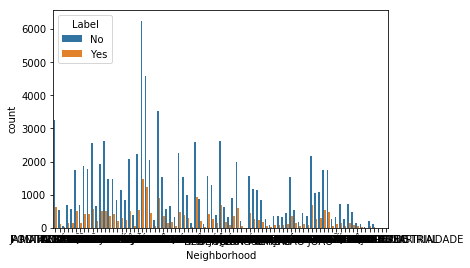

ScheduledDayOfWeek,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday
Label,,,,,,
No,15028,18524,23,14373,20877,19383
Yes,3887,4561,1,3700,5291,4879


No show rate among ScheduledDayOfWeek = Friday: 0.205
No show rate among ScheduledDayOfWeek = Monday: 0.198
No show rate among ScheduledDayOfWeek = Saturday: 0.042
No show rate among ScheduledDayOfWeek = Thursday: 0.205
No show rate among ScheduledDayOfWeek = Tuesday: 0.202
No show rate among ScheduledDayOfWeek = Wednesday: 0.201


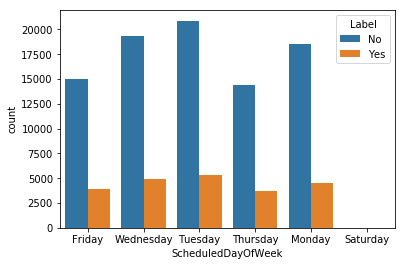

AppointmentDayOfWeek,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday
Label,,,,,,
No,14982,18025,30,13909,20488,20774
Yes,4037,4690,9,3338,5152,5093


No show rate among AppointmentDayOfWeek = Friday: 0.212
No show rate among AppointmentDayOfWeek = Monday: 0.206
No show rate among AppointmentDayOfWeek = Saturday: 0.231
No show rate among AppointmentDayOfWeek = Thursday: 0.194
No show rate among AppointmentDayOfWeek = Tuesday: 0.201
No show rate among AppointmentDayOfWeek = Wednesday: 0.197


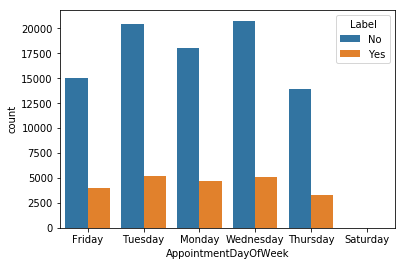

Gender,F,M
Label,,
No,57246,30962
Yes,14594,7725


No show rate among Gender = F: 0.203
No show rate among Gender = M: 0.2


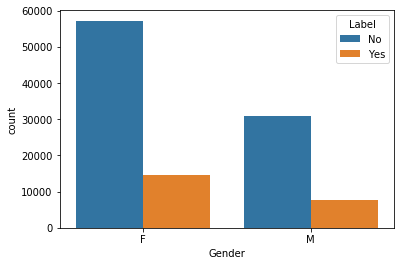

Scholarship,0,1
Label,,
No,79925,8283
Yes,19741,2578


No show rate among Scholarship = 0: 0.198
No show rate among Scholarship = 1: 0.237


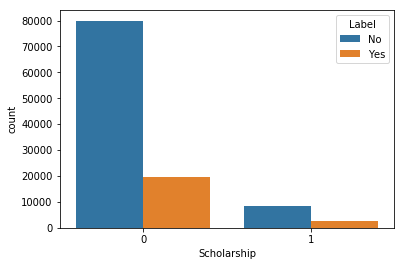

Hypertension,0,1
Label,,
No,70179,18029
Yes,18547,3772


No show rate among Hypertension = 0: 0.209
No show rate among Hypertension = 1: 0.173


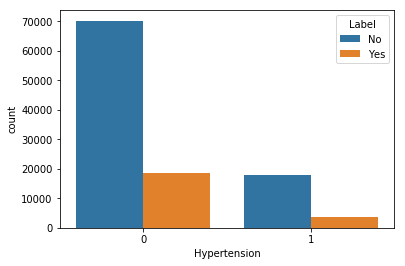

Diabetes,0,1
Label,,
No,81695,6513
Yes,20889,1430


No show rate among Diabetes = 0: 0.204
No show rate among Diabetes = 1: 0.18


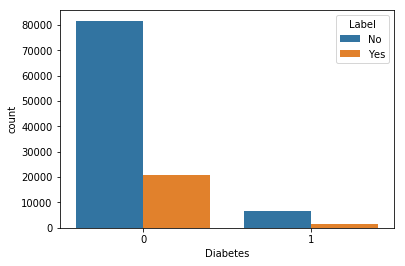

Alcoholism,0,1
Label,,
No,85525,2683
Yes,21642,677


No show rate among Alcoholism = 0: 0.202
No show rate among Alcoholism = 1: 0.201


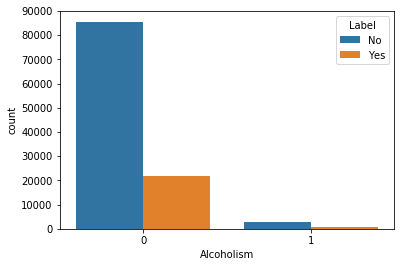

Handicap,0,1
Label,,
No,86374,1834
Yes,21912,407


No show rate among Handicap = 0: 0.202
No show rate among Handicap = 1: 0.182


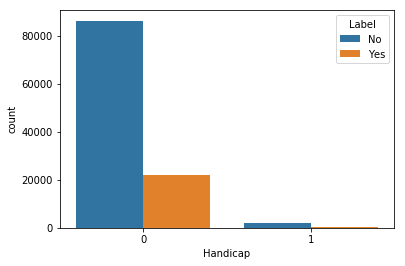

SMSReceived,0,1
Label,,
No,62510,25698
Yes,12535,9784


No show rate among SMSReceived = 0: 0.167
No show rate among SMSReceived = 1: 0.276


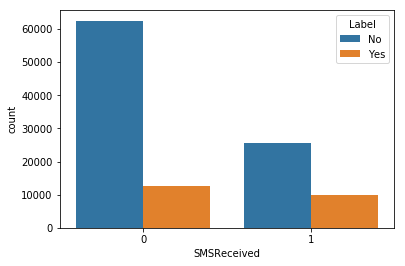

SameDayAppointment,No,Yes
Label,,
No,51437,36771
Yes,20527,1792


No show rate among SameDayAppointment = No: 0.285
No show rate among SameDayAppointment = Yes: 0.046


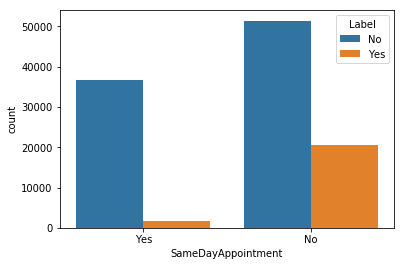

In [11]:
# Show how non-numerical features are distrubuted when faceted by target variable


def facet(df, feature, label, report=False):
    sns.countplot(x=feature, hue=label, data=df)

    plotData = (
        df.groupby([feature, label])
        .size()
        .reset_index()
        .pivot(columns=feature, index=label, values=0)
    )
    display(plotData)
    for ix, i in enumerate(plotData.columns):
        print(
            "No show rate among {0} = {1}: {2}".format(
                feature,
                i,
                round(plotData.iloc[1, ix] / plotData.iloc[:, ix].sum(axis=0), 3),
            )
        )

    plt.show()
    # return plotData


for i in nomFeatures:
    facet(df, i, "Label")

### Bivariate EDA, target vs. selected features

In [12]:
# Determine significant and insignificant features

significantFeatures = getStatisticallySignificantNumFeatures(df, target, numFeatures)
insignificantFeatures = getStatisticallyInsignificantNumFeatures(
    df, target, numFeatures
)
print("Significant features: {0}".format(significantFeatures))
print("Insignificant features: {0}".format(insignificantFeatures))

Significant features: ['Age', 'ScheduledHour', 'DaysUntilAppointment']
Insignificant features: []


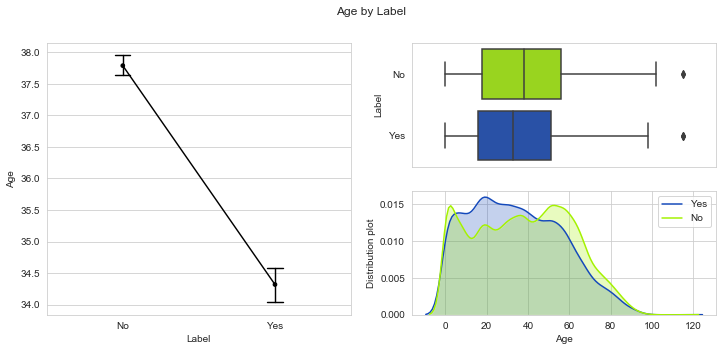

,ztest statistic,p-value
Label,20.090000,0.000000


Label == No Mean: 37.79 (+/- 23.34)
Label == Yes Mean : 34.32 (+/- 21.97)
Absolute Mean Difference Distance: 3.47


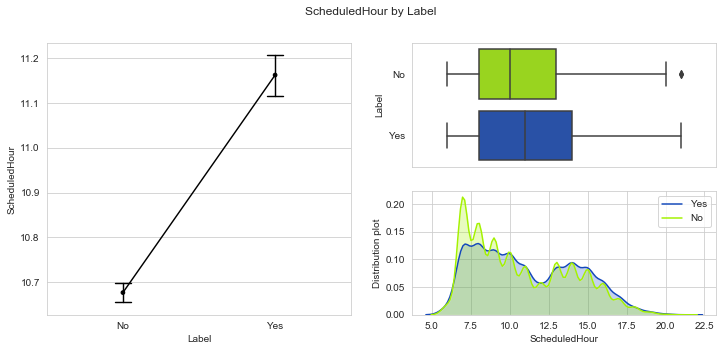

,ztest statistic,p-value
Label,-20.216000,0.000000


Label == No Mean: 10.68 (+/- 3.21)
Label == Yes Mean : 11.16 (+/- 3.22)
Absolute Mean Difference Distance: 0.49


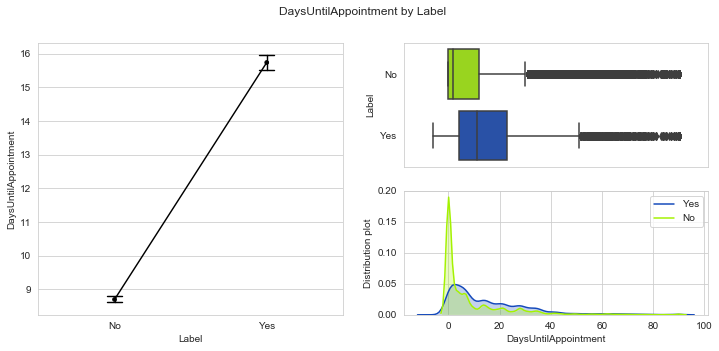

,ztest statistic,p-value
Label,-64.652000,0.000000


Label == No Mean: 8.70 (+/- 14.13)
Label == Yes Mean : 15.74 (+/- 16.00)
Absolute Mean Difference Distance: 7.04


In [13]:
# Create bivariate EDA visuals

for i in significantFeatures:
    cxnAnalysisDisplay(df, target, i, "Yes")

> Remarks - 
- Age - Younger patients no-show more than older patients
- Scheduled hour - It's strange that the hour of the day that someone schedules an appointment would affect the no-show rate, but it shows up as a significant variable nonetheless. This seems like an odd feature, but I don't want to dismiss it because of that. 
- Days until appointment - Patients with many days between scheduling day and appointment day no-show more than those with fewer days between. The KDE plot is espeically interesting. That green spike represents the same-day appointments. These patients don't no-show often. 

### Correlation

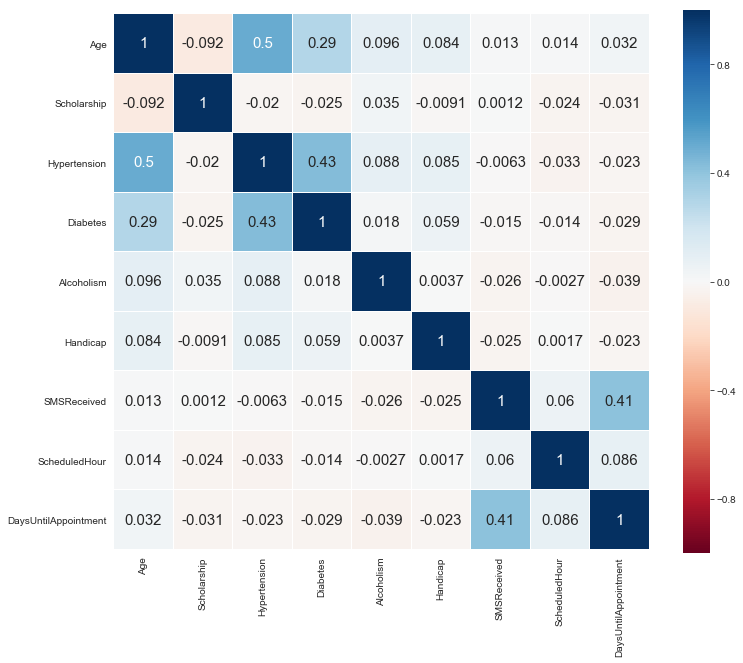

In [14]:
# Review correlation coefficients of feature pairs

plt.figure(figsize=(12, 10))
sns.heatmap(
    df.corr(),
    cmap=plt.cm.RdBu,
    vmax=1.0,
    vmin=-1.0,
    linewidths=0.1,
    annot=True,
    annot_kws={"size": 15},
    square=True,
)

# Modeling

## Modeling tools

In [15]:
# This class allows for evaluating several models, each with their own parameter grid


class EstimatorSelectionHelper:
    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError(
                "Some estimators are missing parameters: {0}".format(missing_params)
            )
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    # Full GridSearchCV
    def fitGs(self, X, y, cv=5, n_jobs=1, verbose=0, scoring=None, refit=True):
        for key in self.keys:
            print("Running GridSearchCV for {0}".format(key))
            model = self.models[key]
            params = self.params[key]
            gs = model_selection.GridSearchCV(
                model,
                params,
                cv=cv,
                n_jobs=n_jobs,
                verbose=verbose,
                scoring=scoring,
                refit=refit,
                return_train_score=True,
            )
            gs.fit(X, y)
            self.grid_searches[key] = gs
        return gs

    # RandomizedSearchCV
    def fitRgs(
        self, X, y, cv=5, n_jobs=1, verbose=0, scoring=None, refit=True, n_iter=15
    ):
        for key in self.keys:
            print("Running RandomizedSearchCV for {0}".format(key))
            model = self.models[key]
            params = self.params[key]
            rgs = model_selection.RandomizedSearchCV(
                model,
                params,
                cv=cv,
                n_jobs=n_jobs,
                verbose=verbose,
                scoring=scoring,
                refit=refit,
                return_train_score=True,
                n_iter=n_iter,
            )
            rgs.fit(X, y)
            self.grid_searches[key] = rgs
        return rgs

    def scoreSummary(self, sort_by="mean_score"):
        def row(key, scores, params):
            d = {
                "estimator": key,
                "min_score": min(scores),
                "max_score": max(scores),
                "mean_score": np.mean(scores),
                "std_score": np.std(scores),
            }
            return pd.Series({**params, **d})

        rows = []
        for k in self.grid_searches:
            # print(k)
            params = self.grid_searches[k].cv_results_["params"]
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]
                scores.append(r.reshape(len(params), 1))

            all_scores = np.hstack(scores)
            for p, s in zip(params, all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ["estimator", "min_score", "mean_score", "max_score", "std_score"]
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [16]:
#  Basic class for selecting attributes by name


class DataFrameSelector(base.BaseEstimator, base.TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names].values

In [17]:
# Pipeline that performs train/test split, selects numerical columns,
# select categorical columns, and recombines into datasets to be used
# to train and evaluate models


def splitPrepPipe(df, label, catFeatures=[]):
    dfTrain, dfTest = model_selection.train_test_split(
        df, test_size=0.1, random_state=42
    )

    yTrain = dfTrain[label]
    yTest = dfTest[label]

    XTrain = dfTrain.drop([label], axis=1)
    XTest = dfTest.drop([label], axis=1)

    allCols = XTrain.columns.values
    index = [np.argwhere(allCols == i)[0][0] for i in catFeatures]
    numCols = np.delete(allCols, index)

    numPipeline = pipeline.Pipeline(
        [
            ("selector", DataFrameSelector(numCols)),
            # ('std_scaler', preprocessing.StandardScaler()),
        ]
    )

    catPipeline = pipeline.Pipeline([("selector", DataFrameSelector(catFeatures))])

    fullPipeline = pipeline.FeatureUnion(
        transformer_list=[("numPipeline", numPipeline), ("catPipeline", catPipeline)]
    )

    XTrain = fullPipeline.fit_transform(XTrain)
    XTest = fullPipeline.transform(XTest)

    return XTrain, XTest, yTrain, yTest

## Prepare data for model

In [18]:
# Convert nominal columns to dummy columns with binary indicators

df = pd.get_dummies(
    df,
    columns=[
        "Gender",
        "Neighborhood",
        "ScheduledDayOfWeek",
        "AppointmentDayOfWeek",
        "SameDayAppointment",
    ],
    drop_first=True,
)

# Encode [Label]

le = preprocessing.LabelEncoder()
df["Label"] = le.fit_transform(df["Label"])

# Inspect changes

df[:5]

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Label,ScheduledHour,DaysUntilAppointment,...,ScheduledDayOfWeek_Saturday,ScheduledDayOfWeek_Thursday,ScheduledDayOfWeek_Tuesday,ScheduledDayOfWeek_Wednesday,AppointmentDayOfWeek_Monday,AppointmentDayOfWeek_Saturday,AppointmentDayOfWeek_Thursday,AppointmentDayOfWeek_Tuesday,AppointmentDayOfWeek_Wednesday,SameDayAppointment_Yes
0,62,0,1,0,0,0,0,0,18,0,...,0,0,0,0,0,0,0,0,0,1
1,56,0,0,0,0,0,0,0,16,0,...,0,0,0,0,0,0,0,0,0,1
2,62,0,0,0,0,0,0,0,16,0,...,0,0,0,0,0,0,0,0,0,1
3,8,0,0,0,0,0,0,0,17,0,...,0,0,0,0,0,0,0,0,0,1
4,56,0,1,1,0,0,0,0,16,0,...,0,0,0,0,0,0,0,0,0,1


## Split data into train and test sets

In [19]:
# Create train test split and review data sizes

XTrain, XTest, yTrain, yTest = splitPrepPipe(df, "Label")

print("XTrain shape: {0}".format(XTrain.shape))
print("yTrain shape: {0}".format(yTrain.shape))
print("XTest shape: {0}".format(XTest.shape))
print("yTest shape: {0}".format(yTest.shape))

XTrain shape: (99474, 101)
yTrain shape: (99474,)
XTest shape: (11053, 101)
yTest shape: (11053,)


## Peform SMOTE - Synthetic minority over-sampling technique

In [20]:
# This is an imbalanced dataset, meaning that there are many more occurrences of one
# of the label categories than the other. To remedy that, one strategy is SMOTE,
# which create additional samples that have the label of the minority (least represented)
# class, with the intention of making it easier for the model to differentiate the
# minority class in the original dataset form the majority class.  SMOTE works by adding
# observations that are similar, but not identical to minority class samples in the
# original dataset

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=1, ratio=1.0)
XTrainOS, yTrainOS = sm.fit_sample(XTrain, yTrain)

print("XTrainOS shape: {0}".format(XTrainOS.shape))
print("yTrainOS shape: {0}".format(yTrainOS.shape))

XTrainOS shape: (158760, 101)
yTrainOS shape: (158760,)


## Models and parameters

In [21]:
# Construct parameter grids for LogisticRegression and RandomForestClassifier

models = {
    "LogisticRegression": linear_model.LogisticRegression(),
    "RandomForestClassifier": ensemble.RandomForestClassifier(),
}

params = {
    "LogisticRegression": {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
    "RandomForestClassifier": {
        "n_estimators": np.arange(800, 1200, 100),
        "max_features": [None, "sqrt"],
        "max_depth": np.arange(8, 14, 2),
        "min_samples_split": np.arange(20, 40, 2),
        "min_samples_leaf": np.arange(2, 40, 2),
        "bootstrap": [True],
    },
}

In [22]:
# Execute GridSearchCV

helper = EstimatorSelectionHelper(models, params)

gridSearch = helper.fitRgs(
    XTrainOS, yTrainOS, n_iter=10, verbose=0, cv=5, scoring="roc_auc"
)

Running RandomizedSearchCV for LogisticRegression


/Users/petersontylerd/.ve/main/lib/python3.6/site-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Running RandomizedSearchCV for RandomForestClassifier


In [23]:
# Review CV results for each model and parameter set

scores = helper.scoreSummary()
scores.fillna("")

,estimator,min_score,mean_score,max_score,std_score,C,bootstrap,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators
9,RandomForestClassifier,0.719567,0.900466,0.960916,0.093259,,True,12,,10,34,1000
7,RandomForestClassifier,0.719157,0.900076,0.960268,0.093280,,True,12,,14,32,800
12,RandomForestClassifier,0.717877,0.898196,0.958171,0.092980,,True,12,,22,34,1000
10,RandomForestClassifier,0.718171,0.896322,0.956138,0.091899,,True,12,sqrt,10,22,900
8,RandomForestClassifier,0.716270,0.894021,0.953501,0.091658,,True,12,sqrt,18,28,1000
16,RandomForestClassifier,0.711244,0.884999,0.943343,0.089634,,True,10,sqrt,26,38,1000
14,RandomForestClassifier,0.712080,0.884537,0.942600,0.088959,,True,10,,26,20,900
13,RandomForestClassifier,0.706727,0.877332,0.935354,0.087994,,True,8,sqrt,12,30,900
11,RandomForestClassifier,0.706189,0.876299,0.933554,0.087802,,True,8,sqrt,26,24,1100
15,RandomForestClassifier,0.706737,0.865151,0.920504,0.081775,,True,8,,34,30,1000


In [24]:
# Review best model params

gridSearch.best_params_

{'n_estimators': 1000,
 'min_samples_split': 34,
 'min_samples_leaf': 10,
 'max_features': None,
 'max_depth': 12,
 'bootstrap': True}

In [25]:
# Fit best model and evaluate ROC AUC on both the train and test set

bestModel = gridSearch.best_estimator_
rf = bestModel.fit(XTrainOS, yTrainOS)

yPredsTrain = rf.predict(XTrainOS)
yPredsTest = rf.predict(XTest)

print("Training data: \n")
print("ROC AUC: {}".format(round(metrics.roc_auc_score(yTrainOS, yPredsTrain), 5)))

print("\nTest data: \n")
print("ROC AUC: {}".format(round(metrics.roc_auc_score(yTest, yPredsTest), 5)))

Training data: 

ROC AUC: 0.81939

Test data: 

ROC AUC: 0.58402
